In [1]:
import importlib
import os

import polars as pl
from dotenv import load_dotenv

import art.utils.benchmarking.charts
from art.utils.benchmarking.charts import (
    percentage_comparison_bar_chart,
    training_progress_chart,
)
from art.utils.benchmarking.load_trajectories import load_trajectories
from art.utils.benchmarking.types import BenchmarkModelKey
from art.utils.get_repo_root_path import get_repo_root_path
from art.utils.s3 import pull_model_from_s3

importlib.reload(art.utils.benchmarking.charts)

load_dotenv()

project_name = "persuasion-bot"

PULL_MODELS = True
if PULL_MODELS:
    await pull_model_from_s3(
        model_name="facts-14b-003", project=project_name, exclude=["checkpoints"]
    )
    await pull_model_from_s3(
        model_name="gpt-4o-mini",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="gpt-4o",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="gpt-4.1",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="grok-3",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="grok-4",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="sonnet-4",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="gemini-2.5-pro",
        project=project_name,
    )
    await pull_model_from_s3(
        model_name="r1-0528",
        project=project_name,
    )

# await load_trajectories.bust_cache()
df = await load_trajectories(
    project_name=project_name,
    models=[
        "facts-14b-003",
        "gpt-4o-mini",
        "gpt-4o",
        # "gpt-4.1",
        "grok-3",
        "grok-4",
        "sonnet-4",
        "gemini-2.5-pro",
        "r1-0528",
    ],
)


benchmarks_dir = f"{get_repo_root_path()}/assets/benchmarks/{project_name}"

os.makedirs(benchmarks_dir, exist_ok=True)

Models:   0%|          | 0/8 [00:00<?, ?model/s]

r1-0528/val:   0%|          | 0/1 [00:00<?, ?file/s]

gemini-2.5-pro/val:   0%|          | 0/1 [00:00<?, ?file/s]

facts-14b-003/train:   0%|          | 0/276 [00:00<?, ?file/s]

facts-14b-003/val:   0%|          | 0/276 [00:00<?, ?file/s]

gpt-4o/val:   0%|          | 0/1 [00:00<?, ?file/s]

sonnet-4/val:   0%|          | 0/1 [00:00<?, ?file/s]

gpt-4o-mini/val:   0%|          | 0/1 [00:00<?, ?file/s]

grok-4/val:   0%|          | 0/1 [00:00<?, ?file/s]

grok-3/val:   0%|          | 0/1 [00:00<?, ?file/s]

In [8]:
orginal_df = df

In [9]:
import polars as pl

df = df.filter(pl.col("step") <= 250)
chart_df = df.filter(pl.col("step") % 10 == 0)

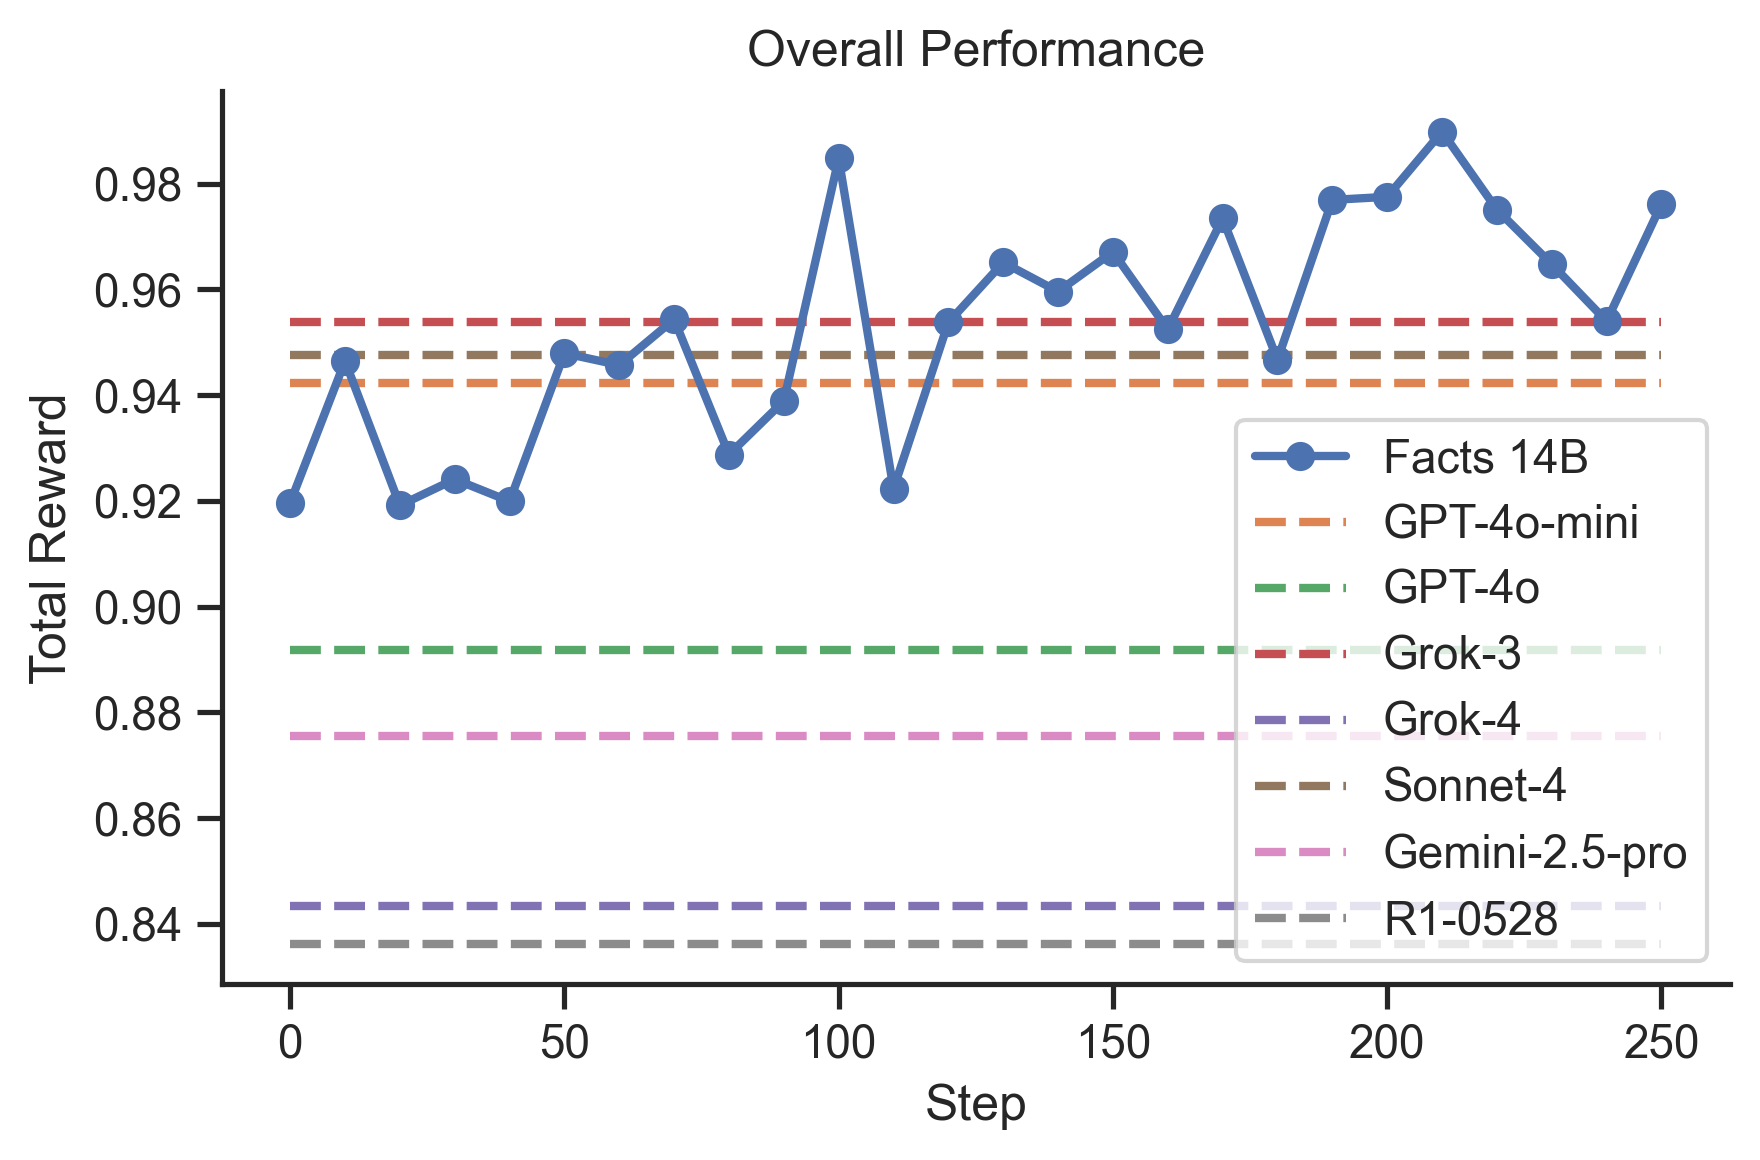

In [28]:
line_graph = training_progress_chart(
    chart_df,
    "reward",
    models=[
        BenchmarkModelKey("facts-14b-003", "Facts 14B", "train"),
        BenchmarkModelKey("gpt-4o-mini", "GPT-4o-mini"),
        BenchmarkModelKey("gpt-4o", "GPT-4o"),
        # BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
        BenchmarkModelKey("grok-3", "Grok-3"),
        BenchmarkModelKey("grok-4", "Grok-4"),
        BenchmarkModelKey("sonnet-4", "Sonnet-4"),
        BenchmarkModelKey("gemini-2.5-pro", "Gemini-2.5-pro"),
        BenchmarkModelKey("r1-0528", "R1-0528"),
    ],
    title="Overall Performance",
    y_label="Total Reward",
)
line_graph.savefig(f"{benchmarks_dir}/accuracy-training-progress.svg")

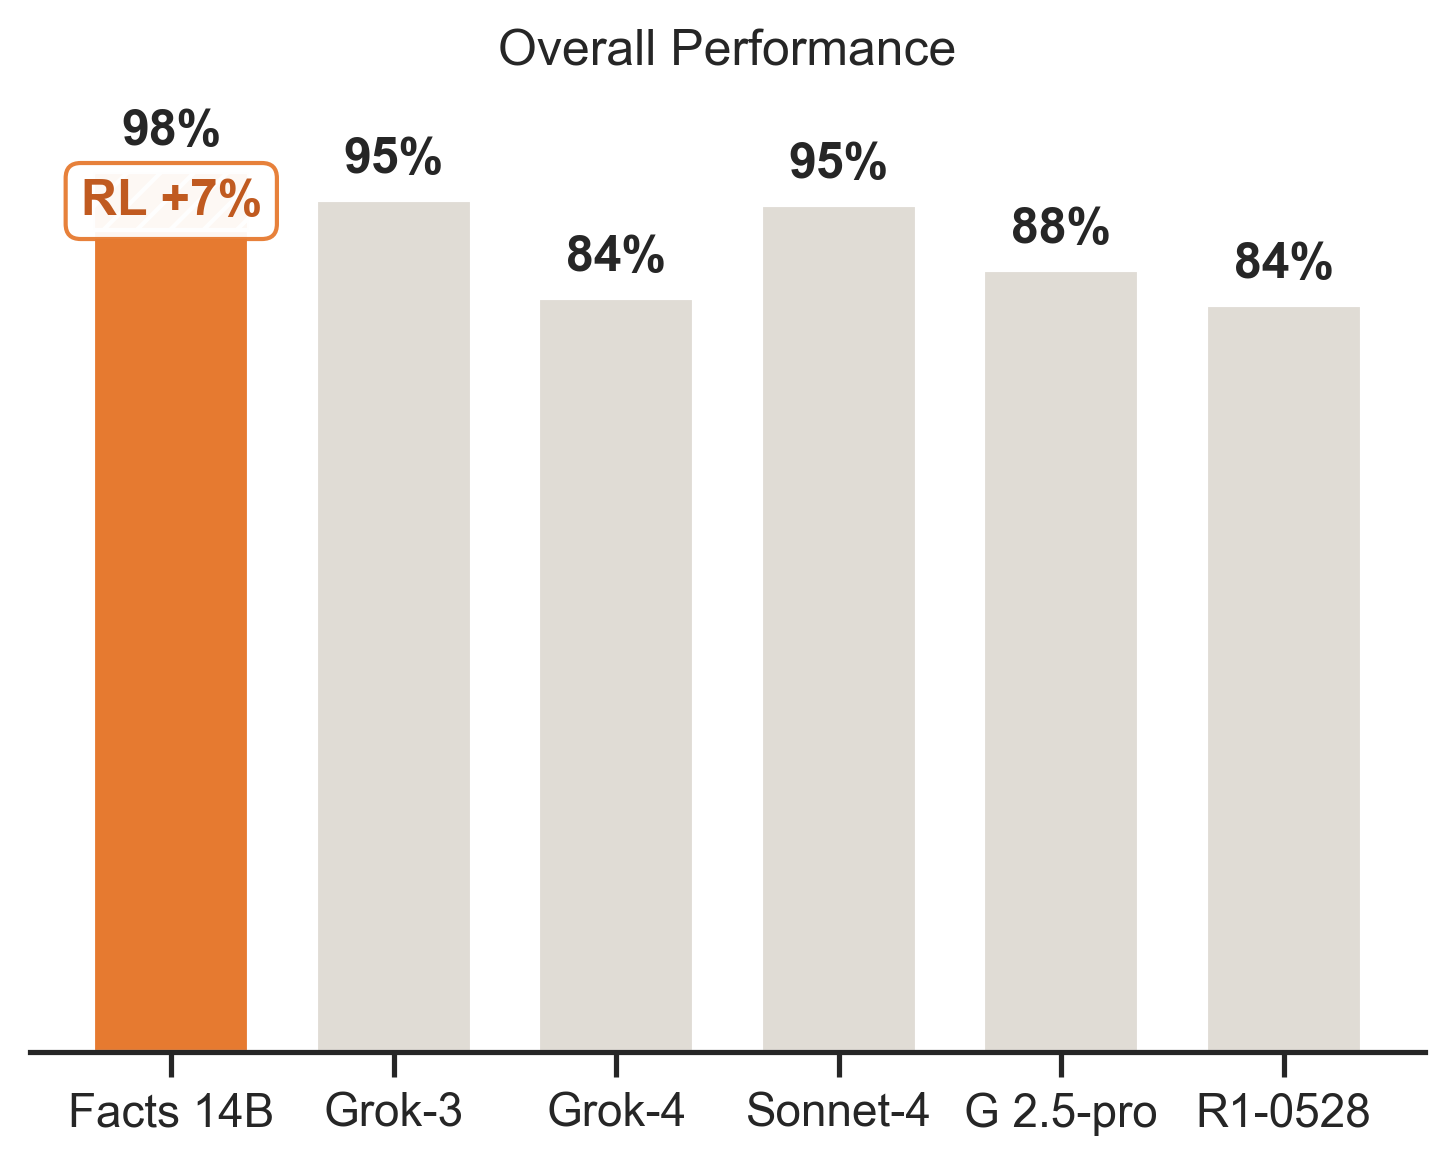

In [29]:
bar_chart = percentage_comparison_bar_chart(
    df,
    metric_name="reward",
    models=[
        BenchmarkModelKey("facts-14b-003", "Facts 14B", "train"),
        # BenchmarkModelKey("gpt-4o-mini", "GPT-4o-mini"),
        # BenchmarkModelKey("gpt-4o", "GPT-4o"),
        # BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
        BenchmarkModelKey("grok-3", "Grok-3"),
        BenchmarkModelKey("grok-4", "Grok-4"),
        BenchmarkModelKey("sonnet-4", "Sonnet-4"),
        BenchmarkModelKey("gemini-2.5-pro", "G 2.5-pro"),
        BenchmarkModelKey("r1-0528", "R1-0528"),
    ],
    title="Overall Performance",
)
bar_chart.savefig(f"{benchmarks_dir}/accuracy-comparison.svg")

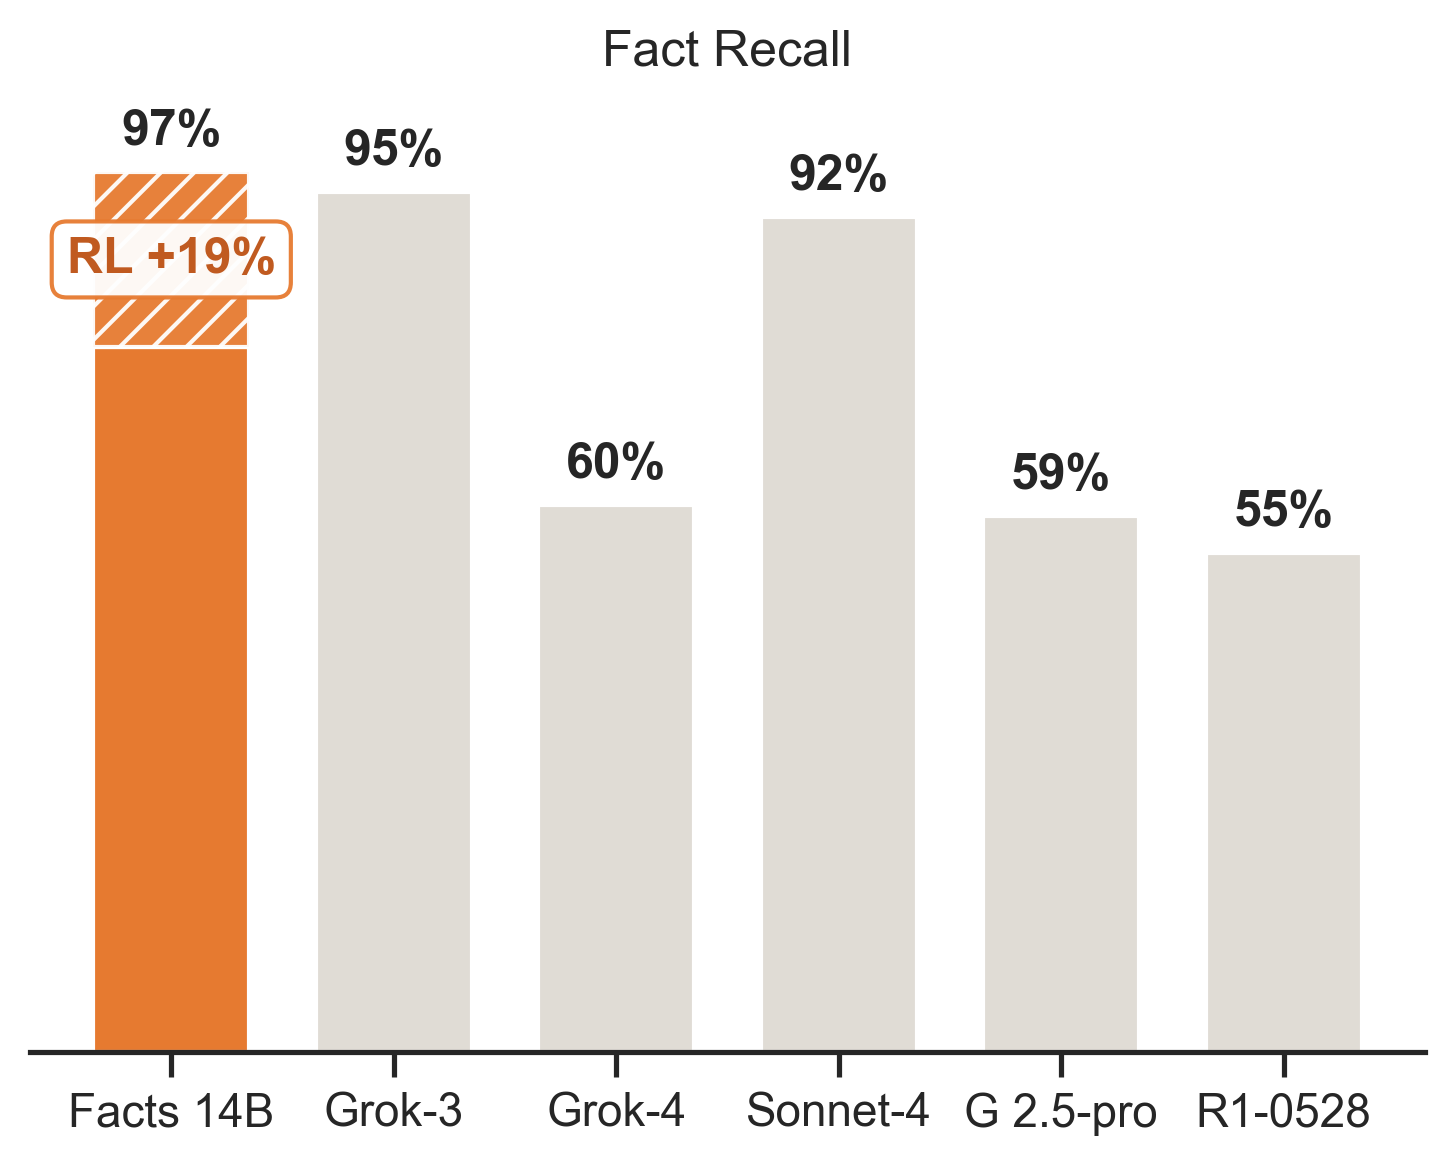

In [30]:
bar_chart = percentage_comparison_bar_chart(
    df,
    metric_name="fact_recall",
    models=[
        BenchmarkModelKey("facts-14b-003", "Facts 14B", "train"),
        # BenchmarkModelKey("gpt-4o-mini", "GPT-4o-mini"),
        # BenchmarkModelKey("gpt-4o", "GPT-4o"),
        # BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
        BenchmarkModelKey("grok-3", "Grok-3"),
        BenchmarkModelKey("grok-4", "Grok-4"),
        BenchmarkModelKey("sonnet-4", "Sonnet-4"),
        BenchmarkModelKey("gemini-2.5-pro", "G 2.5-pro"),
        BenchmarkModelKey("r1-0528", "R1-0528"),
    ],
    title="Fact Recall",
)
bar_chart.savefig(f"{benchmarks_dir}/includes-all-facts-comparison.svg")

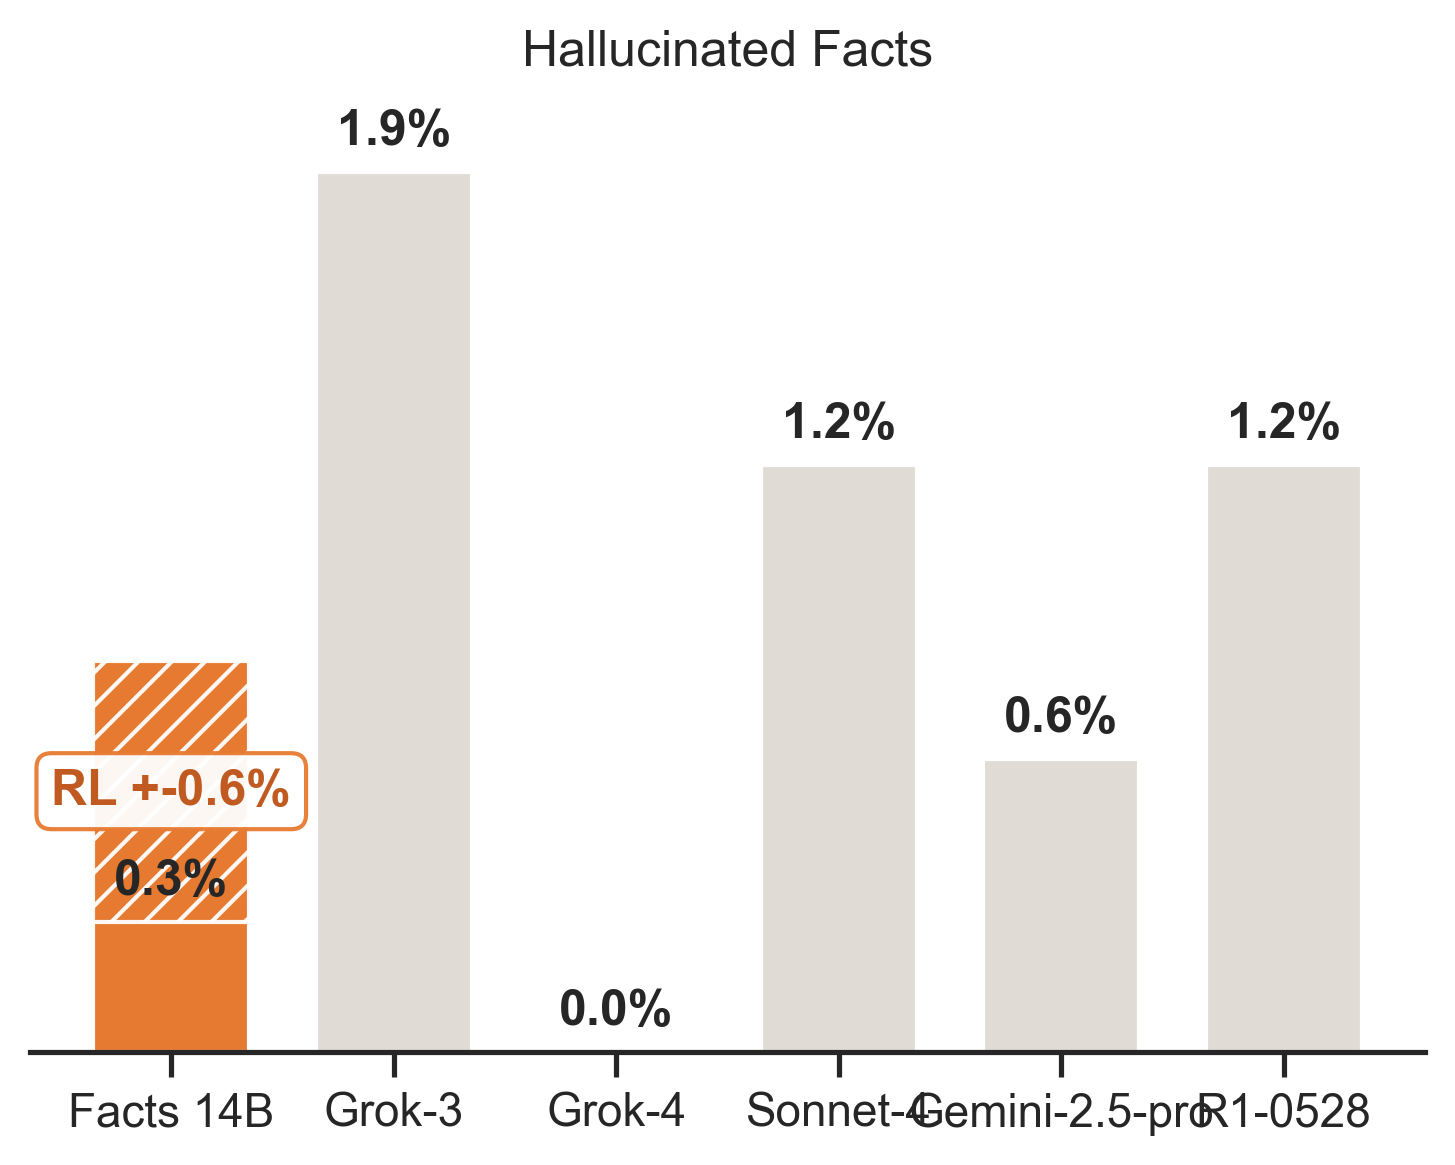

In [31]:
bar_chart = percentage_comparison_bar_chart(
    df,
    metric_name="hallucinated_facts",
    num_decimals=1,
    models=[
        BenchmarkModelKey("facts-14b-003", "Facts 14B", "train"),
        # BenchmarkModelKey("gpt-4o-mini", "GPT-4o-mini"),
        # BenchmarkModelKey("gpt-4o", "GPT-4o"),
        # BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
        BenchmarkModelKey("grok-3", "Grok-3"),
        BenchmarkModelKey("grok-4", "Grok-4"),
        BenchmarkModelKey("sonnet-4", "Sonnet-4"),
        BenchmarkModelKey("gemini-2.5-pro", "Gemini-2.5-pro"),
        BenchmarkModelKey("r1-0528", "R1-0528"),
    ],
    title="Hallucinated Facts",
)
bar_chart.savefig(f"{benchmarks_dir}/hallucinated-facts-comparison.svg")

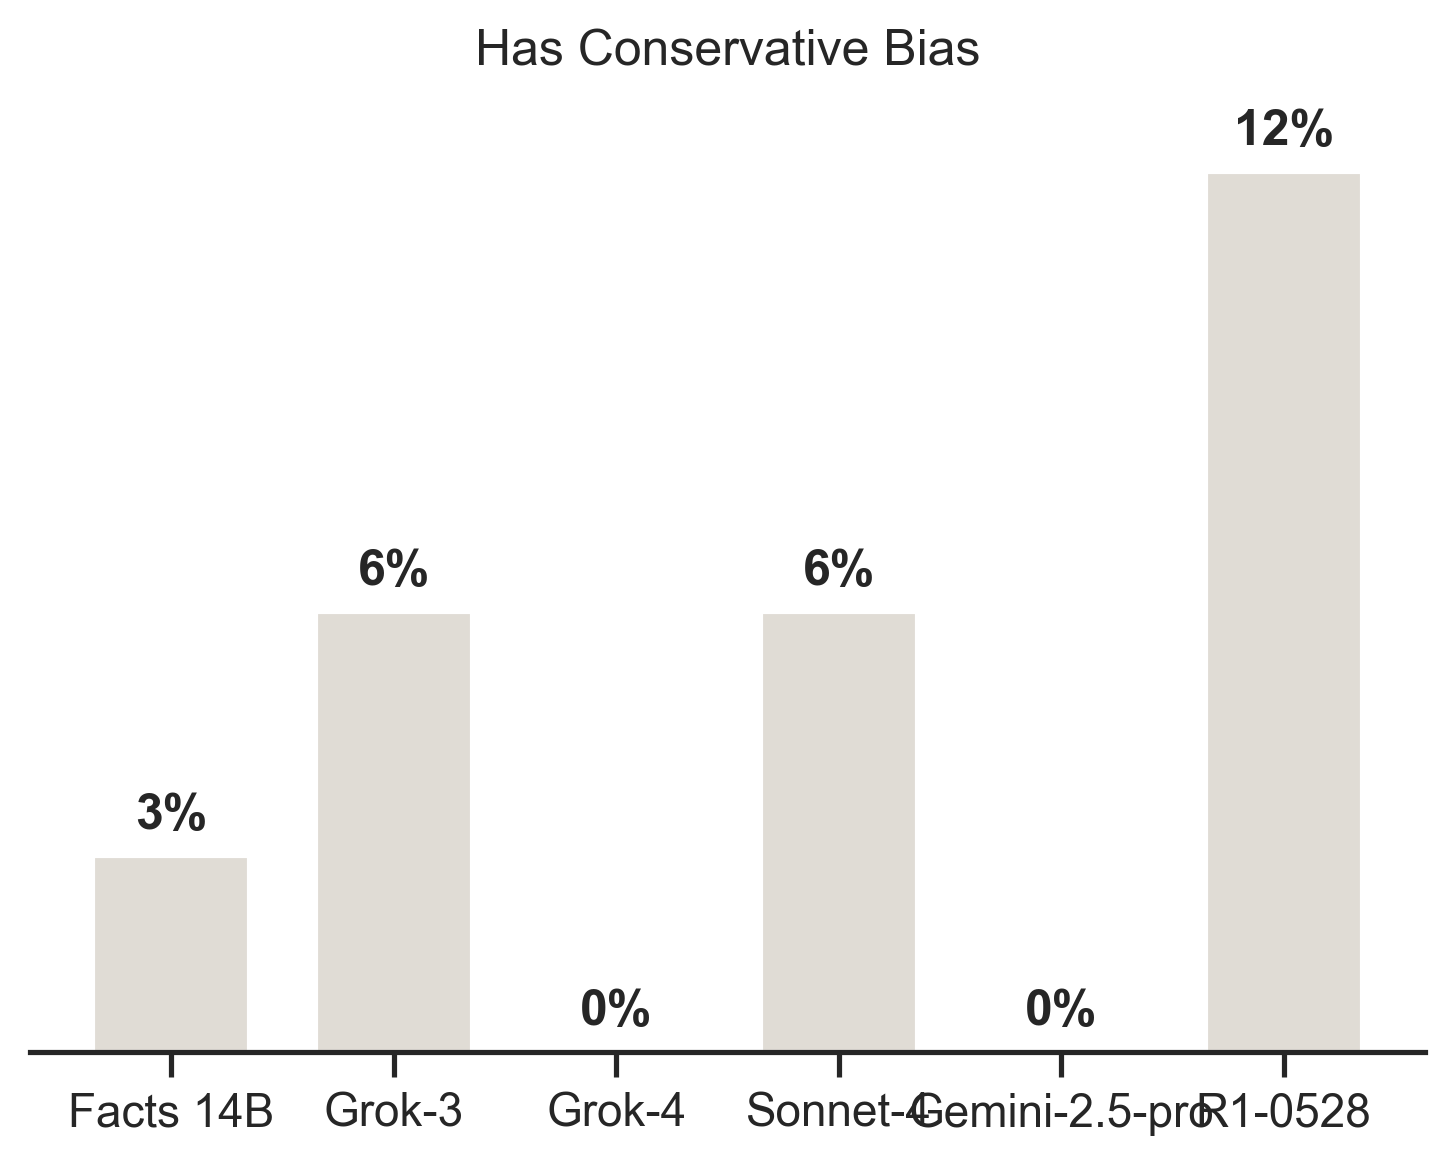

In [32]:
bar_chart = percentage_comparison_bar_chart(
    df,
    metric_name="conservative_bias",
    models=[
        BenchmarkModelKey("facts-14b-003", "Facts 14B", "train"),
        # BenchmarkModelKey("gpt-4o-mini", "GPT-4o-mini"),
        # BenchmarkModelKey("gpt-4o", "GPT-4o"),
        # BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
        BenchmarkModelKey("grok-3", "Grok-3"),
        BenchmarkModelKey("grok-4", "Grok-4"),
        BenchmarkModelKey("sonnet-4", "Sonnet-4"),
        BenchmarkModelKey("gemini-2.5-pro", "Gemini-2.5-pro"),
        BenchmarkModelKey("r1-0528", "R1-0528"),
    ],
    title="Has Conservative Bias",
)
bar_chart.savefig(f"{benchmarks_dir}/has-conservative-bias-comparison.svg")

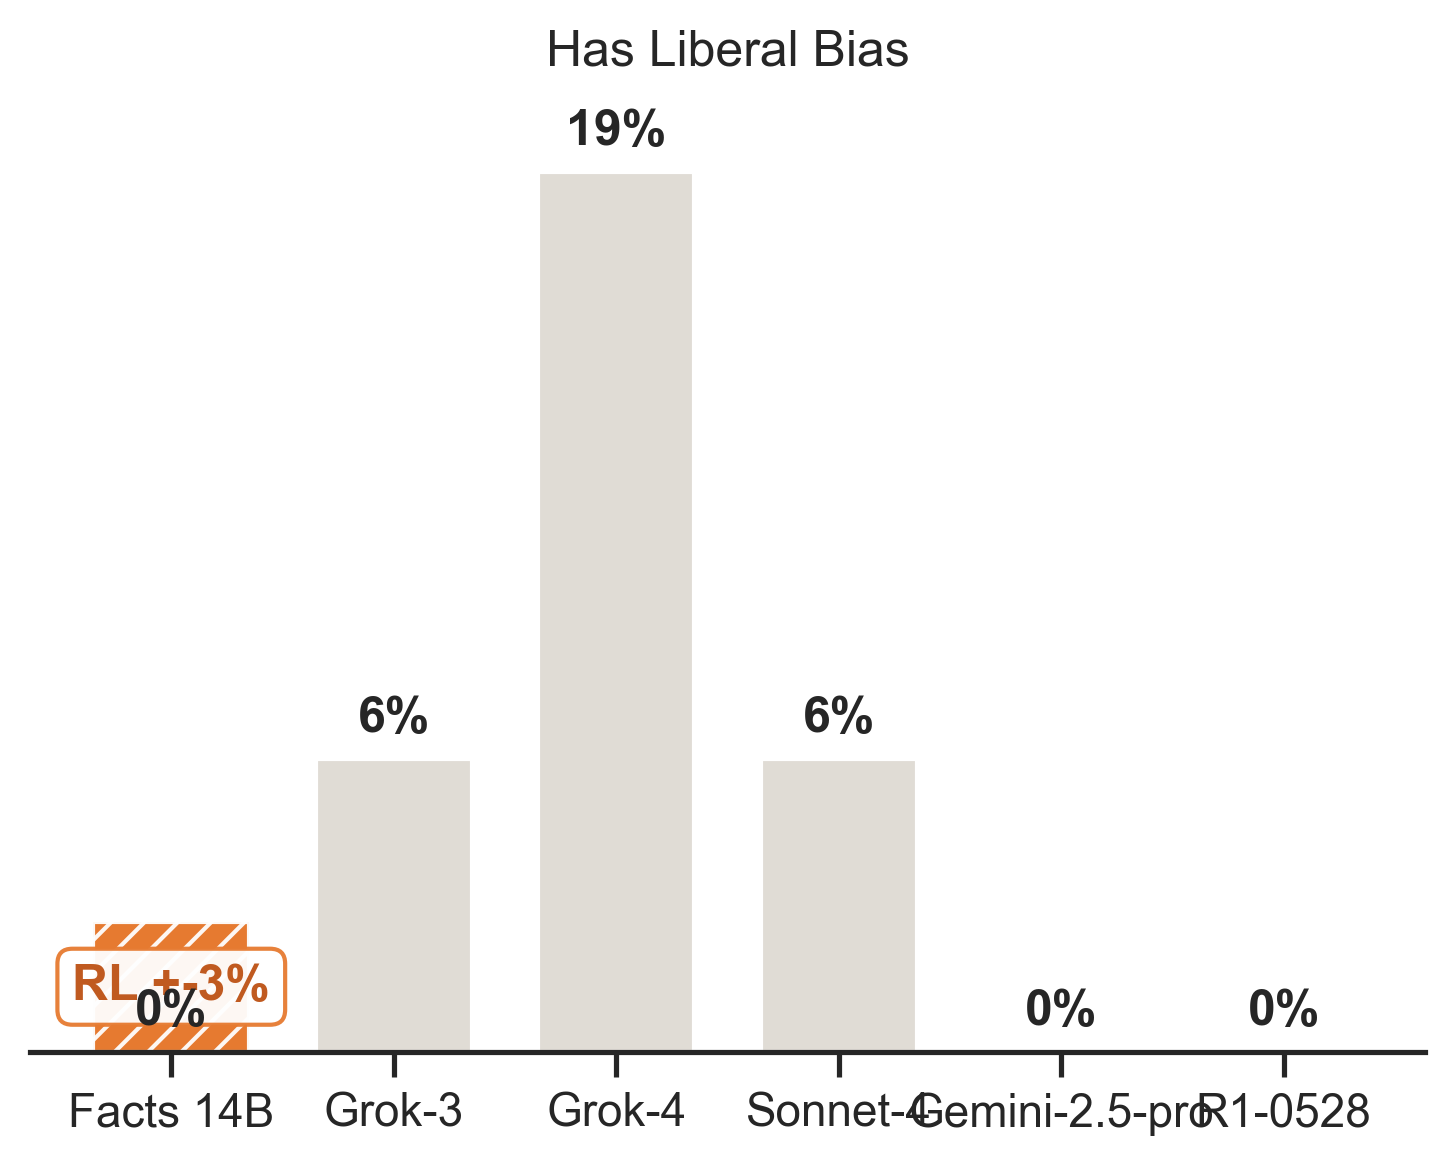

In [33]:
bar_chart = percentage_comparison_bar_chart(
    df,
    metric_name="liberal_bias",
    models=[
        BenchmarkModelKey("facts-14b-003", "Facts 14B", "train"),
        # BenchmarkModelKey("gpt-4o-mini", "GPT-4o-mini"),
        # BenchmarkModelKey("gpt-4o", "GPT-4o"),
        # BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
        BenchmarkModelKey("grok-3", "Grok-3"),
        BenchmarkModelKey("grok-4", "Grok-4"),
        BenchmarkModelKey("sonnet-4", "Sonnet-4"),
        BenchmarkModelKey("gemini-2.5-pro", "Gemini-2.5-pro"),
        BenchmarkModelKey("r1-0528", "R1-0528"),
    ],
    title="Has Liberal Bias",
)
bar_chart.savefig(f"{benchmarks_dir}/has-liberal-bias-comparison.svg")